# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [10]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [1]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
C:\Users\Trijala Reddy\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Trijala Reddy\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Trijala Reddy\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np

In [2]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    print(data.shape)
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data    

In [3]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [4]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    label_test1 = pickle.load(open_ai_quick)
data_train = resize_images(data_train,(5,5))
data_test = resize_images(data_test,(5,5))

n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

(100000, 784)
(25000, 784)


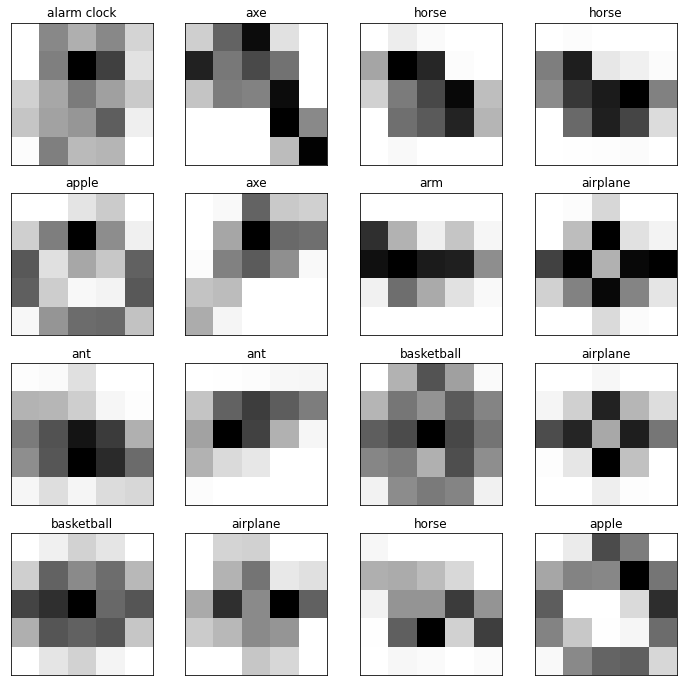

In [5]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    plt.imshow(data_train[ind,:].reshape((5,5)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [6]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**WARNING**: This cell will take a significantly long time to run

In [7]:
model = Sequential()
start = time.time()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
# model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# data_train1 = resize_images(data_train,(20,20))
# data_test1 = resize_images(data_test,(20,20))
# label_train1 = resize_images(label_train,(20,20))
model.fit(data_train, label_train, epochs=500, batch_size=32)
end = time.time()
print(end-start)


Epoch 1/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.8547 - accuracy: 0.6798
Epoch 2/500
100000/100000 [==============================] - 2s 21us/step - loss: 0.8561 - accuracy: 0.7694
Epoch 3/500
100000/100000 [==============================] - 2s 22us/step - loss: 0.8220 - accuracy: 0.7789
Epoch 4/500
100000/100000 [==============================] - 2s 21us/step - loss: 0.8257 - accuracy: 0.7815
Epoch 5/500
100000/100000 [==============================] - 2s 22us/step - loss: 0.8326 - accuracy: 0.7820
Epoch 6/500
100000/100000 [==============================] - 2s 21us/step - loss: 0.8408 - accuracy: 0.7829 1s - - ETA: 0s - los
Epoch 7/500
100000/100000 [==============================] - 2s 22us/step - loss: 0.8431 - accuracy: 0.7824
Epoch 8/500
100000/100000 [==============================] - 2s 22us/step - loss: 0.8534 - accuracy: 0.7810
Epoch 9/500
100000/100000 [==============================] - 2s 22us/step - loss: 0.8669 - accuracy: 0.7788
Epoch 

100000/100000 [==============================] - 2s 23us/step - loss: 1.0421 - accuracy: 0.7433
Epoch 74/500
100000/100000 [==============================] - 2s 25us/step - loss: 1.0466 - accuracy: 0.7421
Epoch 75/500
100000/100000 [==============================] - 2s 23us/step - loss: 1.0499 - accuracy: 0.7422
Epoch 76/500
100000/100000 [==============================] - 2s 23us/step - loss: 1.0583 - accuracy: 0.7419
Epoch 77/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.0593 - accuracy: 0.7413
Epoch 78/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.0523 - accuracy: 0.7403
Epoch 79/500
100000/100000 [==============================] - 2s 21us/step - loss: 1.0533 - accuracy: 0.7402
Epoch 80/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.0575 - accuracy: 0.7383
Epoch 81/500
100000/100000 [==============================] - 2s 23us/step - loss: 1.0518 - accuracy: 0.7397
Epoch 82/500
100000/100000 [====

100000/100000 [==============================] - 2s 23us/step - loss: 1.1321 - accuracy: 0.7222
Epoch 148/500
100000/100000 [==============================] - 2s 21us/step - loss: 1.1251 - accuracy: 0.7221 0s - loss: 1.1198 
Epoch 149/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.1166 - accuracy: 0.7214
Epoch 150/500
100000/100000 [==============================] - 2s 21us/step - loss: 1.1301 - accuracy: 0.7201
Epoch 151/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.1181 - accuracy: 0.7197
Epoch 152/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.1297 - accuracy: 0.7210
Epoch 153/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.1328 - accuracy: 0.7194
Epoch 154/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.1333 - accuracy: 0.7216
Epoch 155/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.1239 - accuracy: 0.7210
Epoch

100000/100000 [==============================] - 2s 22us/step - loss: 1.1341 - accuracy: 0.7155
Epoch 222/500
100000/100000 [==============================] - 2s 23us/step - loss: 1.1339 - accuracy: 0.7172 0s - loss: 1.1363 
Epoch 223/500
100000/100000 [==============================] - 2s 23us/step - loss: 1.1391 - accuracy: 0.7162
Epoch 224/500
100000/100000 [==============================] - 2s 24us/step - loss: 1.1402 - accuracy: 0.7152
Epoch 225/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.1405 - accuracy: 0.7143
Epoch 226/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.1329 - accuracy: 0.7144
Epoch 227/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.1531 - accuracy: 0.7147
Epoch 228/500
100000/100000 [==============================] - 2s 23us/step - loss: 1.1504 - accuracy: 0.7152
Epoch 229/500
100000/100000 [==============================] - 2s 24us/step - loss: 1.1462 - accuracy: 0.7157
Epoch

100000/100000 [==============================] - 2s 23us/step - loss: 1.1276 - accuracy: 0.7087 0s - loss: 1.1273 - accuracy: 
Epoch 296/500
100000/100000 [==============================] - 2s 23us/step - loss: 1.1293 - accuracy: 0.7074
Epoch 297/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.1320 - accuracy: 0.7074
Epoch 298/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.1386 - accuracy: 0.7067
Epoch 299/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.1370 - accuracy: 0.7069
Epoch 300/500
100000/100000 [==============================] - 2s 23us/step - loss: 1.1311 - accuracy: 0.7083
Epoch 301/500
100000/100000 [==============================] - 3s 27us/step - loss: 1.1489 - accuracy: 0.7086
Epoch 302/500
100000/100000 [==============================] - 2s 23us/step - loss: 1.1293 - accuracy: 0.7084
Epoch 303/500
100000/100000 [==============================] - 2s 24us/step - loss: 1.1331 - accuracy: 

100000/100000 [==============================] - 2s 22us/step - loss: 1.1167 - accuracy: 0.7085
Epoch 369/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.1222 - accuracy: 0.7103
Epoch 370/500
100000/100000 [==============================] - 3s 25us/step - loss: 1.1068 - accuracy: 0.7102
Epoch 371/500
100000/100000 [==============================] - 2s 24us/step - loss: 1.1102 - accuracy: 0.7084
Epoch 372/500
100000/100000 [==============================] - 2s 23us/step - loss: 1.1094 - accuracy: 0.7097
Epoch 373/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.1164 - accuracy: 0.7096
Epoch 374/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.1088 - accuracy: 0.7093
Epoch 375/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.1160 - accuracy: 0.7099
Epoch 376/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.1117 - accuracy: 0.7094
Epoch 377/500
100000/100

100000/100000 [==============================] - 2s 23us/step - loss: 1.0988 - accuracy: 0.7052
Epoch 443/500
100000/100000 [==============================] - 2s 23us/step - loss: 1.0923 - accuracy: 0.7060
Epoch 444/500
100000/100000 [==============================] - 3s 26us/step - loss: 1.0940 - accuracy: 0.7051
Epoch 445/500
100000/100000 [==============================] - 2s 23us/step - loss: 1.0899 - accuracy: 0.7054
Epoch 446/500
100000/100000 [==============================] - 2s 24us/step - loss: 1.0899 - accuracy: 0.7058
Epoch 447/500
100000/100000 [==============================] - 2s 23us/step - loss: 1.0851 - accuracy: 0.7059
Epoch 448/500
100000/100000 [==============================] - 2s 23us/step - loss: 1.0847 - accuracy: 0.7074
Epoch 449/500
100000/100000 [==============================] - 2s 23us/step - loss: 1.0991 - accuracy: 0.7060
Epoch 450/500
100000/100000 [==============================] - 2s 22us/step - loss: 1.0936 - accuracy: 0.7058
Epoch 451/500
100000/100

In [9]:
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))


Testing accuracy 0.7042


In [ ]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')